# <center> TP MAISON : PREPROCESSING</center>

## II. Text Processing

Modules

In [2]:
# DM & DA
import pandas as pd
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fisma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Dataframe

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Q1 : Pouvez-vous écrire une fonction qui : tokenize un document,
supprime les stopwords, supprime les tokens de moins de 3 lettres
?

In [5]:
ps = PorterStemmer()
wl = WordNetLemmatizer()

def preprocess_data(data):
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) # ENLEVER URLS
    review =re.sub(r'<.*?>',' ',review) # ENLEVER LES TAGS HTML
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # ENLEVER LES EMOTICONS
                           u"\U0001F300-\U0001F5FF"  # SYBOLES ET PICTOGRAMMES
                           u"\U0001F680-\U0001F6FF"  # TRANSPORTS ET MAPS
                           u"\U0001F1E0-\U0001F1FF"  # FLAGS (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # Juste le texte
    review = review.lower() # en minuscule
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #steeming
    review = [i for i in review if len(i)>3] # Enlever les caractères de moins de 3 de longueur
    review = ' '.join(review)
    return review

df["Cleaned_text"] = df["text"].apply(preprocess_data)

Q2 : Comment peut-on reconstituer le corpus (c'est-à dire un texte avec
l’ensemble des documents) ?

In [6]:
df

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid shelter place notifi offic evacu shelter...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,sent photo rubi alaska smoke wildfir pour school
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrari thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,polic investig bike collid littl portug bike r...


In [7]:
corpus = ""

for i in df["Cleaned_text"]:
    corpus += f'{i}\n' 

print(corpus)

deed reason earthquak allah forgiv
forest fire near rong sask canada
resid shelter place notifi offic evacu shelter place order expect
peopl receiv wildfir evacu order california
sent photo rubi alaska smoke wildfir pour school
rockyfir updat california close direct lake counti fire cafir wildfir
flood disast heavi rain caus flash flood street manit colorado spring area
hill fire wood
emerg evacu happen build across street
afraid tornado come area
three peopl heat wave
haha south tampa flood wait second live south tampa gonna gonna fvck flood
rain flood florida tampabay tampa lost count
flood bago myanmar arriv bago
damag school multi crash break

love fruit
summer love
fast
goooooooaaaaaal
ridicul
london cool
love
wonder
looooool
shit
last week
love girlfriend
cooool
like pasta

bbcmtd wholesal market ablaz
alway bring heavi metal
africanbaz break news nigeria flag ablaz
ablaz
side look last night ablaz
phdsquar mufc built much hype around acquisit doubt ablaz season
inec offic abia a

Q3. Une fois ce corpus constitué, combien de tokens uniques le
constitue? Ce nombre vous apparaît-il faible, important,
gigantesque ?

In [8]:
corpus_list = corpus.split()
len(corpus_list)

58327

Il est composé de 58327 mots, et cela parait beaucoup pour qualifier un tweet

Q4. Comment réduire ce nombre de tokens uniques, ou autrement dit
“comment réduire la taille du vocabulaire” de ce corpus ?

En Enlevant les doublons 

In [9]:
len(corpus_list)

npArray = np.array(corpus_list)
uniqueNpArray = np.unique(npArray)
len(uniqueNpArray.tolist())

11685

Q5.Combien de tokens sont présents une seule fois ? Ces tokens nous
seront-ils utiles ?


Dont seulement 11685 mots uniques, il

Q6. Wordcloud

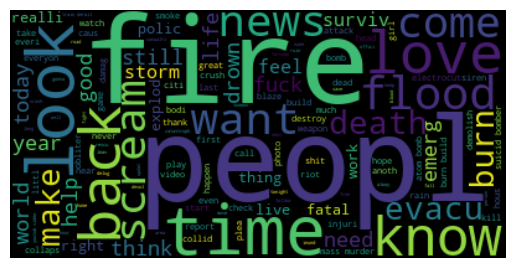

In [10]:
wc = WordCloud(background_color='black')
wc.generate(' '.join(df['Cleaned_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
df.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid shelter place notifi offic evacu shelter...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,sent photo rubi alaska smoke wildfir pour school
